# Benchmark Results
This notebook visualizes the output from the different models on different classification problems

In [1]:
import glob

import numpy as np
import pandas as pd
from plotnine import *

## Sepsis classification

In [2]:
in_files = glob.glob('../../results/single_label.*')
print(in_files[:5])

['../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.2.tsv', '../../results/single_label.sepsis.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv']


In [3]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.910853,"GSE112811,GSE99967,GSE93777,GSE8121,SRP077975,...",2599,PCA,pytorch_supervised
1,0.989051,"GSE112811,GSE8121,GSE14844,GSE42834,GSE79150,G...",2293,PCA,pytorch_supervised
2,0.859857,"GSE112811,GSE99967,GSE93777,GSE8121,GSE14844,G...",2694,PCA,pytorch_supervised
3,0.965090,"GSE61635,GSE99967,GSE93777,GSE8121,GSE14844,GS...",2227,PCA,pytorch_supervised
4,0.970085,"GSE112811,GSE61635,GSE99967,GSE93777,GSE14844,...",2647,PCA,pytorch_supervised
...,...,...,...,...,...
0,0.950241,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2492,PCA,pytorch_supervised
1,0.840517,"GSE38511,GSE33341,GSE65682,GSE14844,SRP092402,...",2651,PCA,pytorch_supervised
2,0.964981,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2344,PCA,pytorch_supervised
3,0.901361,"GSE65088,SRP049820,GSE5504,GSE33341,GSE65682,G...",2821,PCA,pytorch_supervised


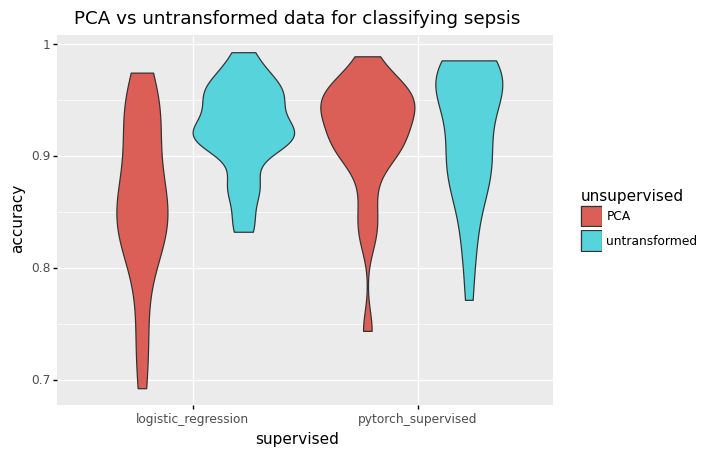

<ggplot: (8781592473748)>


In [4]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

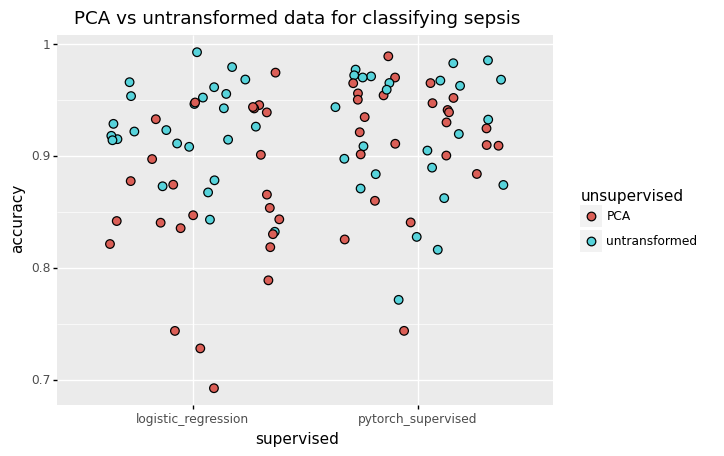

<ggplot: (8781592473649)>


In [5]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=3)
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

## All labels

In [6]:
in_files = glob.glob('../../results/all_labels.*')
print(in_files[:5])

['../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.0.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.pytorch_supervised.refinebio_labeled_dataset.1.tsv', '../../results/all_labels.PCA.pytorch_supervised.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.1.tsv']


In [7]:
metrics = None
for path in in_files:
    if metrics is None:
        metrics = pd.read_csv(path, sep='\t')
        
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        metrics['unsupervised'] = unsupervised_model
        metrics['supervised'] = supervised_model
    else:
        new_df = pd.read_csv(path, sep='\t')
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        new_df['unsupervised'] = unsupervised_model
        new_df['supervised'] = supervised_model
        
        metrics = pd.concat([metrics, new_df])

metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.120998,"GSE22098,GSE28750,GSE55201,GSE45291,GSE26049,G...",8391,PCA,logistic_regression
1,0.044194,"GSE22098,GSE28750,GSE55201,GSE32198,GSE72798,G...",8107,PCA,logistic_regression
2,0.010417,"GSE55201,GSE3491,GSE45291,GSE26049,GSE32198,GS...",8122,PCA,logistic_regression
3,0.002366,"GSE22098,GSE28750,GSE55201,GSE3491,GSE45291,GS...",7698,PCA,logistic_regression
4,0.012376,"GSE22098,GSE28750,GSE3491,GSE45291,GSE26049,GS...",8618,PCA,logistic_regression
...,...,...,...,...,...
0,0.002183,"GSE93272,E-MEXP-3567,GSE79150,SRP132709,GSE570...",8402,untransformed,logistic_regression
1,0.070588,"GSE42305,E-MEXP-3567,GSE61240,GSE79150,GSE9327...",8109,untransformed,logistic_regression
2,0.053706,"GSE42305,E-MEXP-3567,GSE61240,SRP132709,GSE791...",7981,untransformed,logistic_regression
3,0.017518,"GSE42305,GSE61240,SRP132709,GSE57065,GSE13015,...",8864,untransformed,logistic_regression


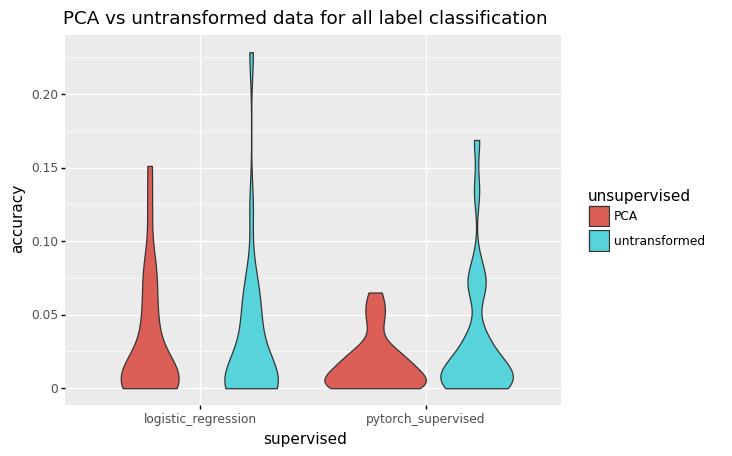

<ggplot: (8781583177391)>


In [8]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

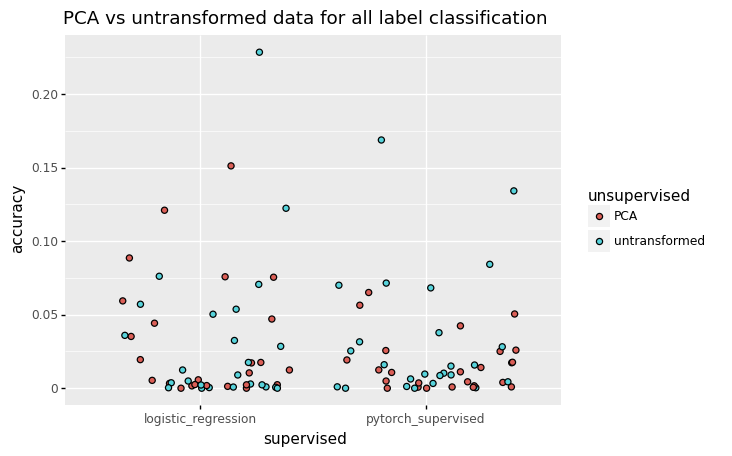

<ggplot: (8781583245445)>


In [9]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=2)
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

# Subsets of healthy labels

In [10]:
in_files = glob.glob('../../results/subset_label.sepsis*')
print(in_files[:5])

['../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.4.tsv', '../../results/subset_label.sepsis.logistic_regression.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.0.tsv', '../../results/subset_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.tsv']


In [11]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics = sepsis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
sepsis_metrics['healthy_used'] = sepsis_metrics['healthy_used'].round(1)
    
sepsis_metrics

,accuracy,train studies,train sample count,healthy_used,unsupervised,supervised
0,0.910112,"GSE112811,GSE99039,GSE33341,GSE93606,GSE28750,...",1386,0.1,untransformed,pytorch_supervised
1,0.917431,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1548,0.2,untransformed,pytorch_supervised
2,0.923077,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1710,0.3,untransformed,pytorch_supervised
3,0.926667,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1871,0.4,untransformed,pytorch_supervised
4,0.953216,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",2033,0.5,untransformed,pytorch_supervised
...,...,...,...,...,...,...
35,0.951087,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1425,0.6,PCA,pytorch_supervised
36,0.978261,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1478,0.7,PCA,pytorch_supervised
37,0.961957,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1530,0.8,PCA,pytorch_supervised
38,0.951087,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1583,0.9,PCA,pytorch_supervised


In [12]:
print(sepsis_metrics[sepsis_metrics['healthy_used'] == 1])

    accuracy                                      train studies  \
9   0.941392  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
19  0.962919  GSE50635,GSE33341,GSE3284,GSE38511,SRP049820,S...   
29  0.924794  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
39  0.908333  GSE112811,GSE99039,GSE3284,GSE93606,GSE28750,G...   
49  0.880460  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
..       ...                                                ...   
39  0.996610  GSE64338,GSE83456,GSE26378,GSE65682,GSE65088,G...   
9   0.909605  GSE65088,GSE42834,GSE37171,GSE98793,GSE50635,S...   
19  1.000000  GSE33119,GSE65088,GSE42834,GSE50635,GSE66099,G...   
29  0.982456  GSE33119,GSE50635,GSE66099,GSE98793,GSE57065,G...   
39  0.961957  GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...   

    train sample count  healthy_used   unsupervised           supervised  
9                 2842           1.0  untransformed   pytorch_supervised  
19                2279           1.0  untrans

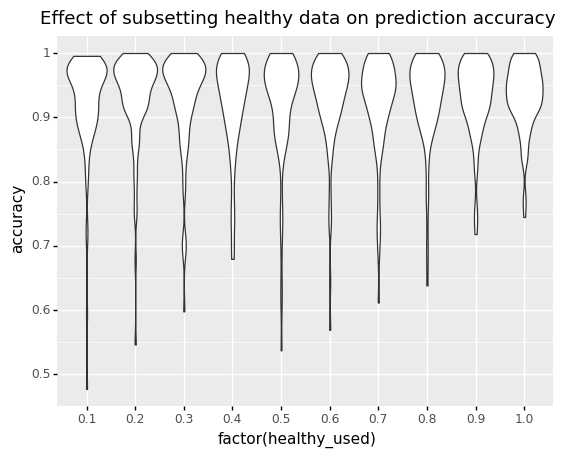

<ggplot: (8781583202070)>


In [13]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', )) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

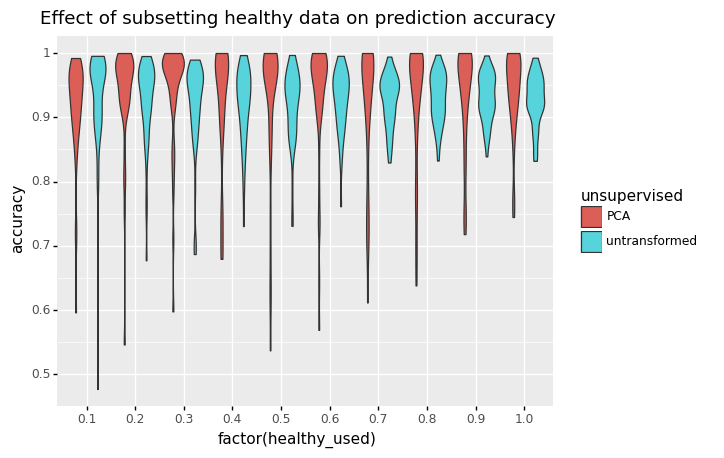

<ggplot: (8781581500859)>


In [14]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

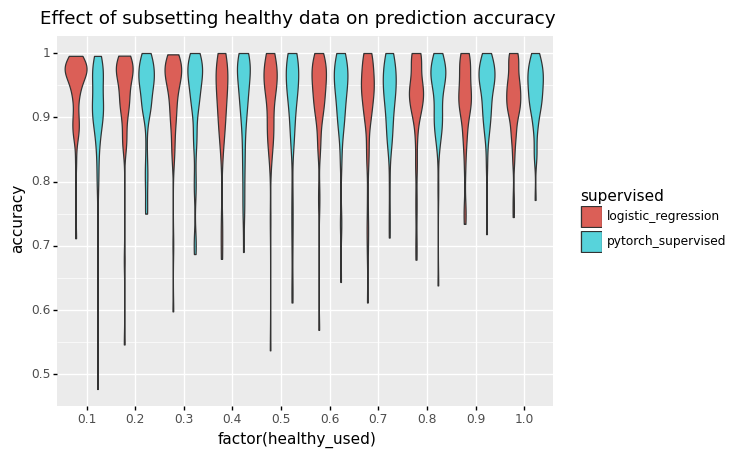

<ggplot: (8781583189462)>


In [15]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Same analysis, but with tb instead of sepsis

In [16]:
in_files = glob.glob('../../results/subset_label.tb*')
print(in_files[:5])

['../../results/subset_label.tb.PCA.pytorch_supervised.refinebio_labeled_dataset.0.tsv', '../../results/subset_label.tb.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.tb.PCA.pytorch_supervised.refinebio_labeled_dataset.1.tsv', '../../results/subset_label.tb.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/subset_label.tb.logistic_regression.refinebio_labeled_dataset.4.tsv']


In [17]:
tuberculosis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    tuberculosis_metrics = pd.concat([tuberculosis_metrics, new_df])
    
tuberculosis_metrics = tuberculosis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
tuberculosis_metrics['healthy_used'] = tuberculosis_metrics['healthy_used'].round(1)
tuberculosis_metrics

,accuracy,train studies,train sample count,healthy_used,unsupervised,supervised
0,0.244353,"GSE33580,GSE21592,GSE46914,GSE40586,GSE99967,G...",456,0.1,PCA,pytorch_supervised
1,0.214751,"GSE33580,GSE21592,GSE46914,GSE40586,GSE99967,G...",605,0.2,PCA,pytorch_supervised
2,0.997807,"GSE33580,GSE21592,GSE46914,GSE40586,GSE99967,G...",755,0.3,PCA,pytorch_supervised
3,0.200000,"GSE33580,GSE21592,GSE46914,GSE40586,GSE99967,G...",904,0.4,PCA,pytorch_supervised
4,0.182418,"GSE33580,GSE21592,GSE46914,GSE40586,GSE99967,G...",1054,0.5,PCA,pytorch_supervised
...,...,...,...,...,...,...
35,0.493113,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",544,0.6,PCA,pytorch_supervised
36,0.487603,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",569,0.7,PCA,pytorch_supervised
37,0.330579,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",593,0.8,PCA,pytorch_supervised
38,0.584022,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",617,0.9,PCA,pytorch_supervised


In [18]:
print(tuberculosis_metrics[tuberculosis_metrics['healthy_used'] == 1])

    accuracy                                      train studies  \
9   0.156044  GSE33580,GSE21592,GSE46914,GSE40586,GSE99967,G...   
19  0.291262  GSE33580,GSE21592,GSE40586,GSE93777,GSE83456,G...   
29  0.326531  GSE21592,GSE40586,GSE83456,GSE14844,GSE25504,G...   
39  1.000000  GSE40586,GSE83456,GSE14844,GSE61635,GSE84844,S...   
9   0.613546  GSE4607,GSE11755,GSE13904,GSE33580,GSE25504,GS...   
..       ...                                                ...   
49  0.227660  GSE8121,GSE31348,SRP077975,GSE73408,GSE28750,G...   
9   0.000000  GSE83456,GSE8121,GSE4607,SRP071965,GSE99039,GS...   
19  0.613793  GSE83456,GSE8121,GSE4607,GSE99039,GSE65682,GSE...   
29  0.513812  GSE8121,GSE4607,GSE58411,GSE65682,GSE26049,GSE...   
39  0.258953  GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...   

    train sample count  healthy_used   unsupervised           supervised  
9                 1801           1.0            PCA   pytorch_supervised  
19                1690           1.0         

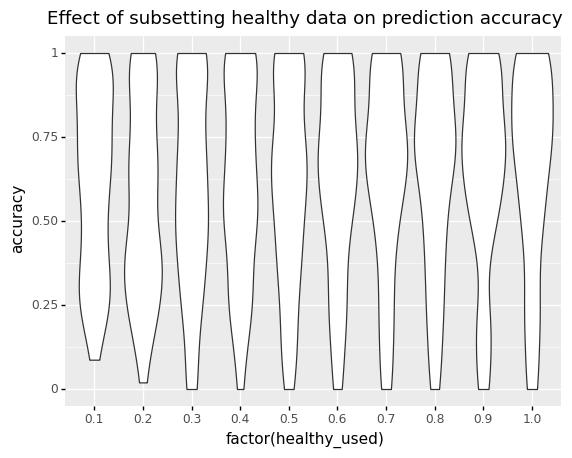

<ggplot: (8781640696311)>


In [19]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

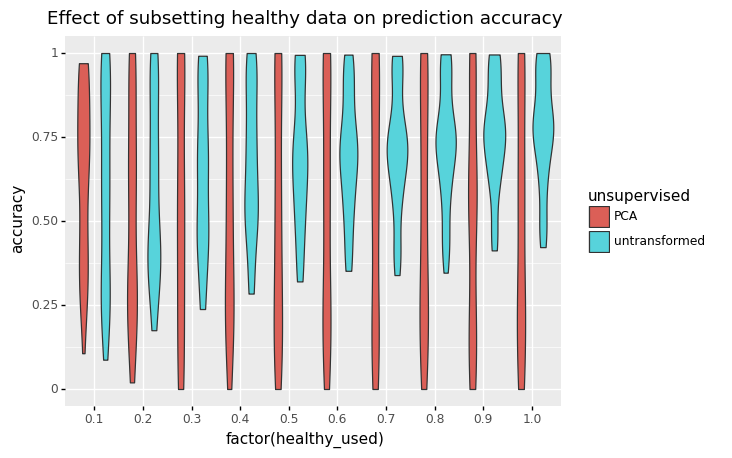

<ggplot: (8781581443392)>


In [20]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

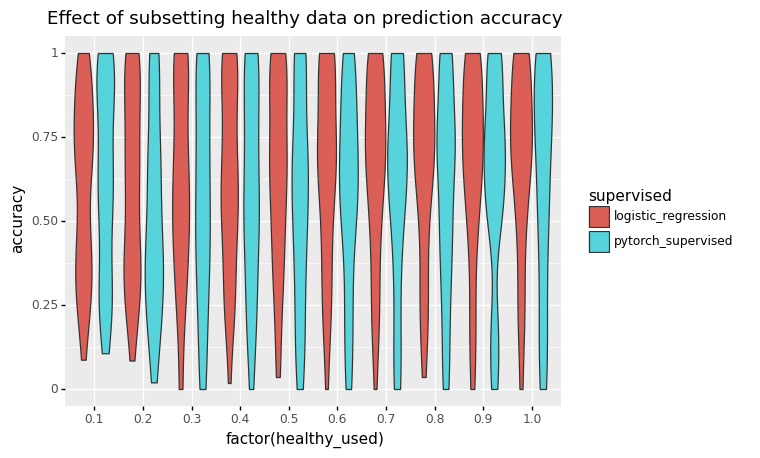

<ggplot: (8781581273781)>


In [21]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)